In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

#option for seeing all columns

#pd.set_option('max_column')

In [3]:
df = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [4]:
#Changing data types [Cleaning data]
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [5]:
df.rename(columns={ 'Activitydate': 'Activity_Date', 'Totalsteps': 'Total_Steps', 
                   'Totaldistance': 'Total_Distance', 'Trackerdistance': 'Tracker_Distance',
                   'Loggedactivitiesdistance': 'Logged_Activities_Distance', 'Veryactivedistance': 'Very_Active_Distance',
                   'Moderatelyactivedistance': 'Moderately_Active_Distance', 'Lightactivedistance': 'Light_Active_Distance',
                   'Sedentaryactivedistance': 'Sedentary_Active_Distance', 'Veryactiveminutes': 'Very_Active_Minutes', 
                   'Fairlyactiveminutes': 'Fairly_Active_Minutes', 'Lightlyactiveminutes': 'Lightly_Active_Minutes', 
                   'Sedentaryminutes': 'Sedentary_Minutes'}, 
          inplace=True)


In [6]:
df_subset = df[['Id', 'ActivityDate', 'TotalSteps', #'Total_Distance',
       #'Tracker_Distance', 'Logged_Activities_Distance',
       #'Very_Active_Distance', 'Moderately_Active_Distance',
       #'Light_Active_Distance', 'Sedentary_Active_Distance',
       'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]

In [7]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [8]:
df_subset['Day_of_the_week'] = df['ActivityDate'].dt.day_name()
df_subset['Number_of_week'] = df['ActivityDate'].dt.weekday

/tmp/ipykernel_17/2046300497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Day_of_the_week'] = df['ActivityDate'].dt.day_name()
/tmp/ipykernel_17/2046300497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Number_of_week'] = df['ActivityDate'].dt.weekday


In [9]:
df_subset.head(3)

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_the_week,Number_of_week
0,1503960366,2016-04-12,13162,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,Thursday,3


In [10]:
#Average quantity of steps doing by each customer
avg_steps = df['TotalSteps']

avg_steps.mean().round(2)

7637.91

In [11]:
#Lets see how many times our customers did > 10 000steps in week and which day of the week this was
df_over_10k = df_subset[df_subset['TotalSteps'] >= 10000]
result = df_over_10k.groupby(['Id', 'Day_of_the_week']).size().unstack(fill_value=0)
print(result.sum())

Day_of_the_week
Friday       33
Monday       40
Saturday     42
Sunday       33
Thursday     46
Tuesday      60
Wednesday    49
dtype: int64


as we can see Tuesday is the wealthiest day of the week for our customers and total_steps are correct in that!

In [12]:
#Need to check a range of a date
df_subset['ActivityDate'].min()

Timestamp('2016-04-12 00:00:00')

In [13]:
df_subset['ActivityDate'].max()

Timestamp('2016-05-12 00:00:00')

In [14]:
# We have a date only from one month which is not good because a technology like this
#is usually used more frequent in hotter season's and less in colder season's 

In [15]:
#Adding category for each ID and his average steps
# Sedentary life < 5000
# Light Active life between 5000 and 7000
# Fairly Active life between 7000 and 9000
# Very Active life 9000 and above

In [16]:

df_subset_avg_steps = df_subset.groupby('Id')['TotalSteps'].mean().round(0)

In [17]:
df_subset_avg_steps.head(3)


Id
1503960366    12117.0
1624580081     5744.0
1644430081     7283.0
Name: TotalSteps, dtype: float64

In [18]:
df_subset_avg_steps = pd.DataFrame(df_subset_avg_steps).sort_values(by='TotalSteps',ascending=False)

In [19]:
df_subset_avg_steps.head(1)

,TotalSteps
Id,
8877689391,16040.0


In [20]:
categories = {
    'Sedentary': (0, 5000),
    'Light Active': (5000, 7000),
    'Fairly Active': (7000, 9000),
    'Very Active': (9000, float('inf'))
}
#creating a function
def categorize_steps(TotalSteps):
    for category, (lower, upper) in categories.items():
        if lower <= TotalSteps < upper:
            return category
#aplyying categories
df_subset['ActivityCategory'] = df_subset['TotalSteps'].apply(categorize_steps)
        

/tmp/ipykernel_17/3900959768.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['ActivityCategory'] = df_subset['TotalSteps'].apply(categorize_steps)


In [21]:
df_subset.head(1)

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_the_week,Number_of_week,ActivityCategory
0,1503960366,2016-04-12,13162,25,13,328,728,1985,Tuesday,1,Very Active


In [22]:
df_subset_avg_steps.nunique()

TotalSteps    33
dtype: int64

In [23]:
id_daily_count = df_subset.groupby('Id')['ActivityDate'].nunique()
all_days_covered = (id_daily_count == 31).all()
if all_days_covered:
    print("All IDs appear on each of the 31 days.")
else:
    print("Not all IDs appear on each of the 31 days.")

Not all IDs appear on each of the 31 days.


In [24]:
df['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [25]:
#This can be problem for us if we want to aggregate data for each customer

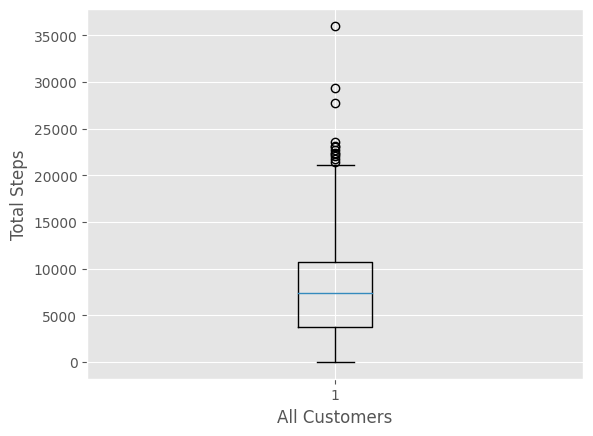

In [26]:
plt.boxplot(df_subset['TotalSteps'])
plt.xlabel('All Customers')
plt.ylabel('Total Steps')
plt.show()

In [27]:
#Showing us totalsteps 25% 75% and mean we can also use describe to see more 
df_subset_without_date = df_subset.drop(columns=['ActivityDate'])
df_subset_without_date.describe()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Number_of_week
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
std,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000


In [28]:
# well 4900 calories was burnt from one person is this really possible?
#This one outlier seems pretty weird 

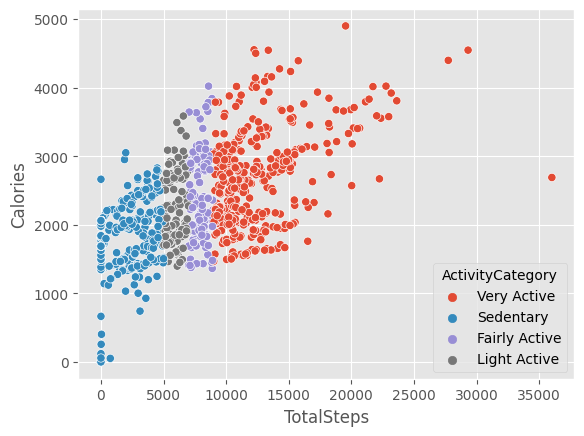

In [29]:
#lets see corellation between steps and calories (if exist)
corr = sns.scatterplot(x=df_subset['TotalSteps'],y=df_subset['Calories'],hue=df_subset['ActivityCategory'])

In [30]:
from scipy.stats import pearsonr
correlation_coefficient= pearsonr(df_subset['TotalSteps'], df_subset['Calories'])
print("Pearson correlation coefficient:", correlation_coefficient)
#as we can see correlation is not very good because its also depends on degree of active life

Pearson correlation coefficient: PearsonRResult(statistic=0.5915680862453359, pvalue=8.203860328505984e-90)


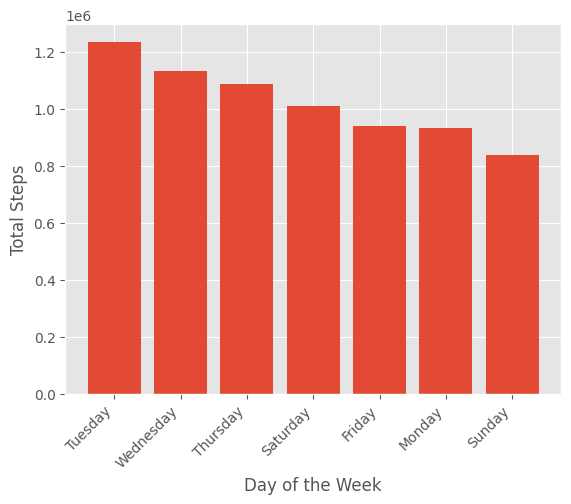

In [31]:

df_sorted = df_subset.groupby('Day_of_the_week')['TotalSteps'].sum().sort_values(ascending=False)
plt.bar(df_sorted.index, df_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

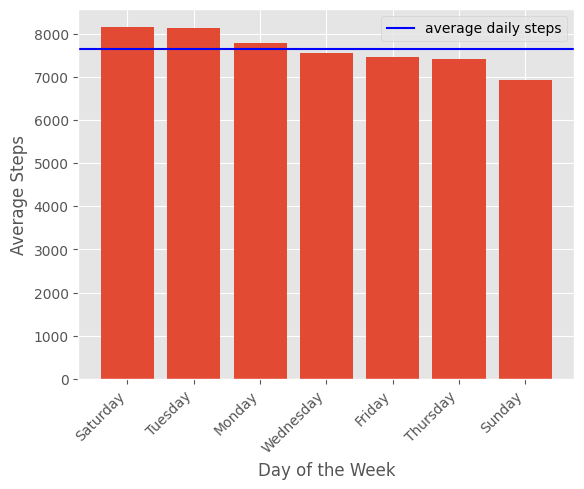

In [32]:

df_sorted = df_subset.groupby('Day_of_the_week')['TotalSteps'].mean().sort_values(ascending=False)
plt.bar(df_sorted.index, df_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.axhline(y=df_subset['TotalSteps'].mean(),color='blue', label='average daily steps')
plt.legend()
plt.show()

As we can see total steps and average steps are not equal by day of the week
This can mean that its depends not only in day of the week but also in week, holidays or by season

Medical News Today cite: ,,For general fitness, most adults should aim for 10,000 steps per day, with fewer than 5,000 steps being a sign of a sedentary lifestyle."


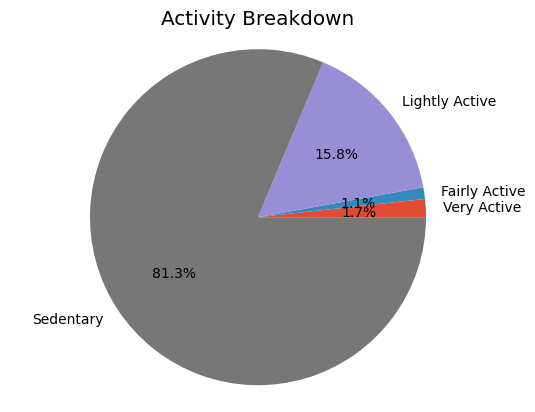

In [33]:
df_subset_very_ac = df['VeryActiveMinutes'].sum()
df_subset_fairly_ac = df['FairlyActiveMinutes'].sum()
df_subset_lightly_ac = df['LightlyActiveMinutes'].sum()
df_subset_sedentary_ac = df['SedentaryMinutes'].sum()
sizes = [df_subset_very_ac, df_subset_fairly_ac, df_subset_lightly_ac, df_subset_sedentary_ac]
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Activity Breakdown')
plt.show()